C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Visualization of clusters')

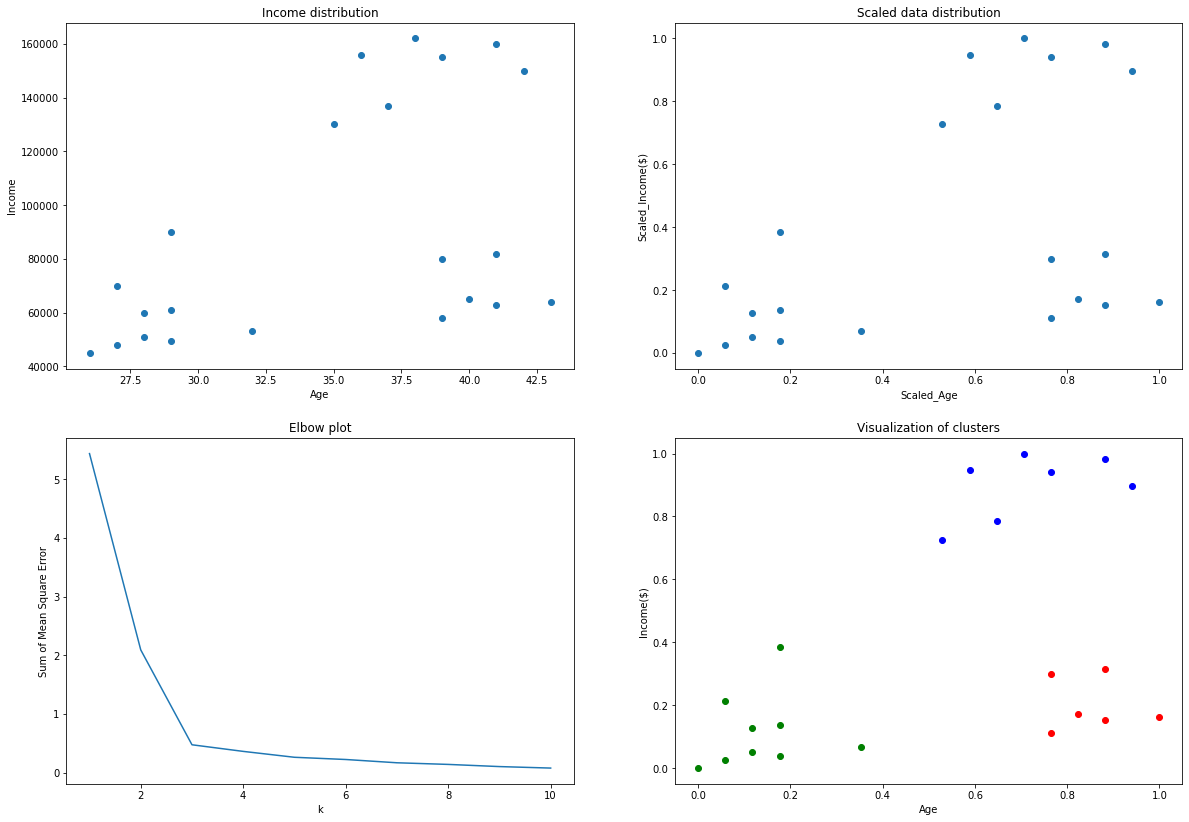

In [26]:
import pandas as pd
from sklearn.cluster import KMeans as km
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mms

df = pd.read_csv('income.csv')

fig=plt.figure(figsize=(20,14))

fig.add_subplot(2,2,1)
plt.scatter(df['Age'],df['Income($)'])
plt.title('Income distribution')
plt.xlabel('Age')
plt.ylabel('Income')

#Scale the dataset to avoid bias as a result of large units.
df['Age']=mms().fit_transform(df[['Age']])
df['Income($)']=mms().fit_transform(df[['Income($)']])
fig.add_subplot(2,2,2)
plt.scatter(df['Age'],df['Income($)'])
plt.title('Scaled data distribution')
plt.xlabel('Scaled_Age')
plt.ylabel('Scaled_Income($)')

#Create an elbow plot to determine the optimum value of K.
Mean_Square_Error=[]
for k in range(1,11):
    x=km(n_clusters=k)
    x.fit(df[['Age','Income($)']])
    Mean_Square_Error.append(x.inertia_)
k_range=range(1,11)
fig.add_subplot(2,2,3)
plt.xlabel('k')
plt.ylabel('Sum of Mean Square Error')
plt.plot(k_range,Mean_Square_Error)
plt.title('Elbow plot')

#Predict the clusters and visualize the result using scatter plots.
df['Cluster']=km(n_clusters=3).fit_predict(df[['Age','Income($)']])
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
fig.add_subplot(2,2,4)
plt.scatter(df1['Age'],df1['Income($)'],color='red')
plt.scatter(df2['Age'],df2['Income($)'],color='green')
plt.scatter(df3['Age'],df3['Income($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('Visualization of clusters')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
      Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    0.000112  0.000168  0.708333  0.539874  0.422741  0.011965   
1    0.000125  0.000188  0.442198  0.614704  0.599540  0.110409   
2    0.000125  0.000187  0.396552  0.549792  0.479632  0.150119   
3    0.000065  0.000194  0.856837  0.077254  0.272650  0.413659   
4    0.000079  0.000119  0.895416  0.214203  0.284997  0.155010   
..        ...       ...       ...       ...       ...       ...   
435  0.000026  0.000078  0.776890  0.315197  0.419191  0.

Text(0.5, 1.0, 'Scatter Plot')

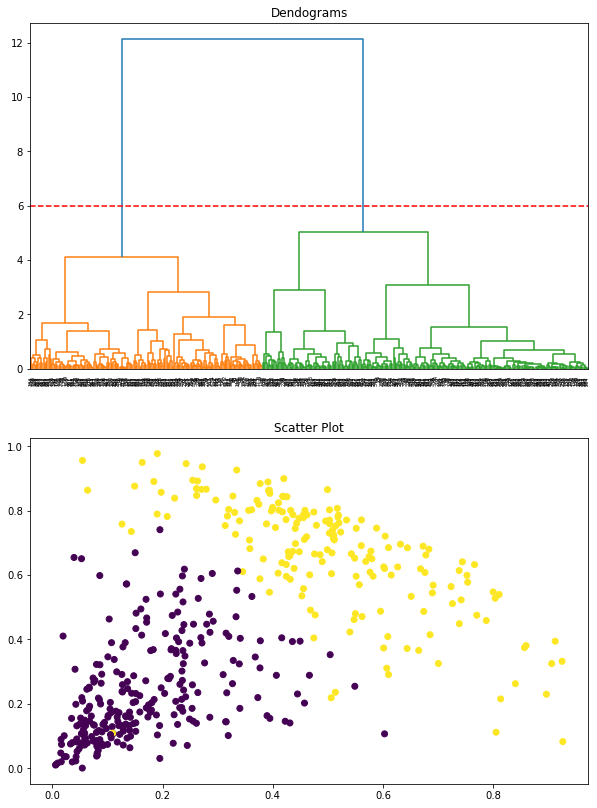

In [32]:
'''This program was adopted from dphi. The code uses wholesale_customer_data dataset
to demonstrate how hierarchical clustering is conducted.'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering as AC
import scipy.cluster.hierarchy as shc

#Read the csv document and print te first five rows.
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Wholesale_customers_data.csv')
x = data.head()
print(x)

#Scale the data to values between 0 and 1 to prevent items with large units from creating a bias on the algorithm. 
data_scaled = pd.DataFrame(normalize(data),columns=data.columns)
print(data_scaled)

fig=plt.figure(figsize=(10,14))

#Create a subplot for the dendrogram.
fig.add_subplot(2,1,1)
plt.title('Dendograms')

#Plot the dendrogram.
dend = shc.dendrogram(shc.linkage(data_scaled,method='ward'))
#Draw a dotted line to mark the point delimiting the clusters.
plt.axhline(y=6,color='r',linestyle='--')

#Create two clusters on the dataset using euclidian distance as the distance matrix.
cluster = AC(n_clusters=2,affinity='euclidean',linkage='ward')
fit_data = pd.DataFrame(cluster.fit_predict(data_scaled))
print(fit_data)

#Scatter plot.
fig.add_subplot(2,1,2)
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster.labels_)
plt.title('Scatter Plot')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
             State  cluster labels
0          Alabama               1
1           Alaska               1
2          Arizona               1
3         Arkansas               2
4       California               1
5         Colorado               2
6      Connecticut               0
7         Delaware               1
8          Florida               1
9          Georgia               2
10          Hawaii               0
11           Idaho               0
12        Illinois               1
13         Indiana               0
14            Iowa               0
15 

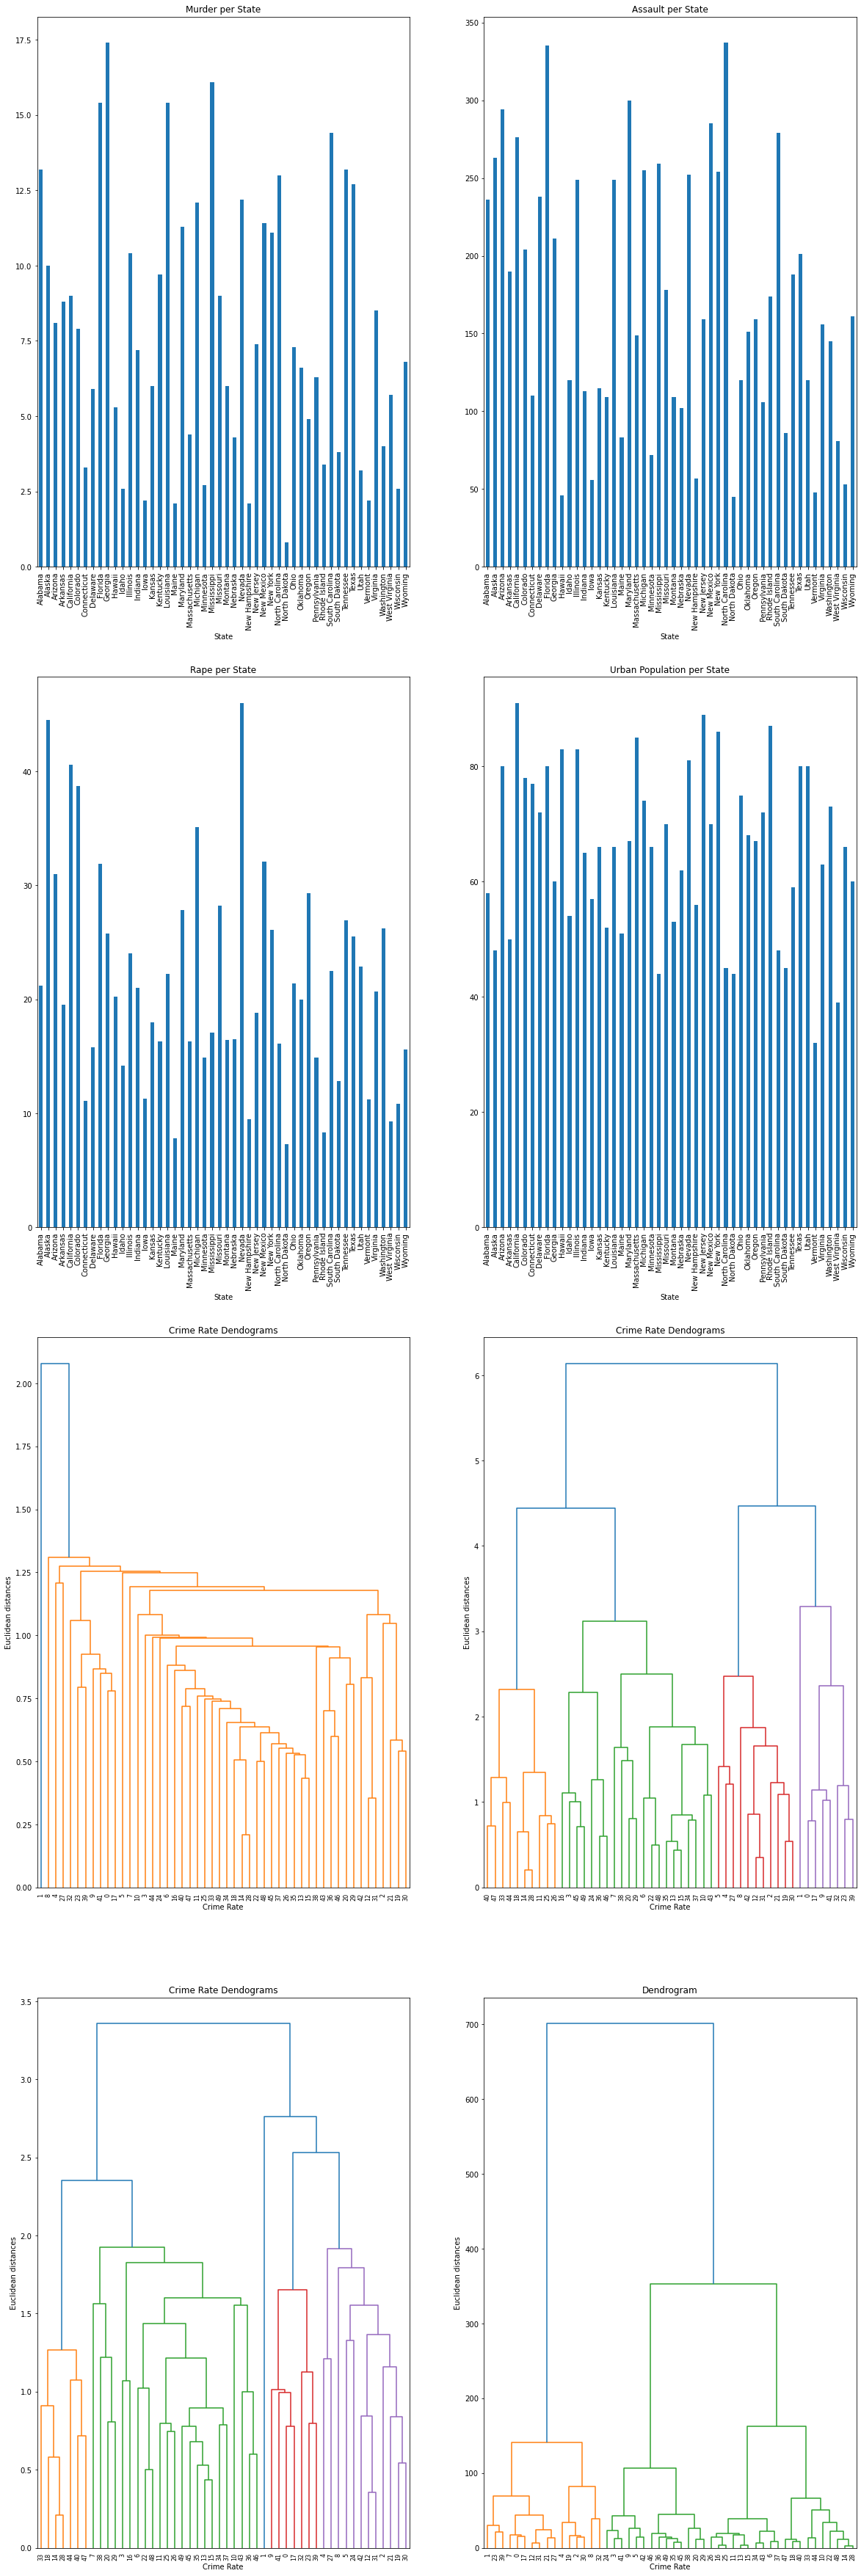

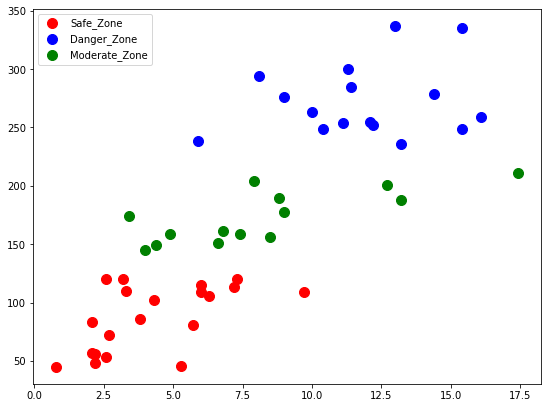

In [2]:
'''This program was adopted from dphi. The code uses USArrest dataset
to demonstrate how hierarchical clustering is conducted and the different
types of heirarchical clustering.'''

import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# ignoring any warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")
crime.columns=['State','Murder','Assault','UrbanPop','Rape']

fig=plt.figure(figsize=(20,80))

#Understanding basic information about the dataset
crime.shape
crime.info()
crime.describe()
crime.isnull().sum()
fig.add_subplot(5,2,1)
crime.groupby('State')['Murder'].max().plot(kind='bar')
plt.title('Murder per State')
fig.add_subplot(5,2,2)
crime.groupby('State')['Assault'].max().plot(kind='bar')
plt.title('Assault per State')
fig.add_subplot(5,2,3)
crime.groupby('State')['Rape'].max().plot(kind='bar')
plt.title('Rape per State')
fig.add_subplot(5,2,4)
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')
plt.title('Urban Population per State')

data = crime.iloc[:,1:].values

#Using sklearn.preprocessing.StandardScaler() to standardize the data points.
scaler= StandardScaler()
scaled_data = scaler.fit_transform(data)

#Generating dendrograms for the dataset using different distance matrices (single, average, complete, and ward).
fig.add_subplot(5,2,5)
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

fig.add_subplot(5,2,6)
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

fig.add_subplot(5,2,7)
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

fig.add_subplot(5,2,8)
dendrogram = sch.dendrogram(sch.linkage(data, method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

#Selecting the desired number of clusters and predicting labels for the different rows.
clusters = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
crime['cluster labels'] =clusters.fit_predict(data)

fig=plt.figure(figsize=(20,40))
#Setting categories based on the cluster each state belongs to.
Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
fig.add_subplot(5,2,9)
plt.scatter(data[crime['cluster labels']==0, 0], data[crime['cluster labels']==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[crime['cluster labels']==1, 0], data[crime['cluster labels']==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[crime['cluster labels']==2, 0], data[crime['cluster labels']==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()

print(crime[['State','cluster labels']])

In [52]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape,cluster labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [3]:
crime

,State,Murder,Assault,UrbanPop,Rape,cluster labels
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2
